<h2>Poisson problem</h2>

\begin{align*}
    - \Delta u(x, \omega) &= 1 \hspace{0.2cm} \text{on} \hspace{0.2cm} D(\omega)\\
    u(x, \omega) &= 0 \hspace{0.2cm} \text{on} \hspace{0.2cm} \delta D(\omega)
\end{align*}

In [2]:
from helpers import *

In [ ]:
# Find KL truncation level for a given mesh resolution
randomFieldV, jacobianV = calculate_vector_field_eigenpairs(mesh_resolution=14)
print(f"randomFieldV.J: {randomFieldV.J}")
randomFieldV, jacobianV = calculate_vector_field_eigenpairs(mesh_resolution=10)
print(f"randomFieldV.J: {randomFieldV.J}")

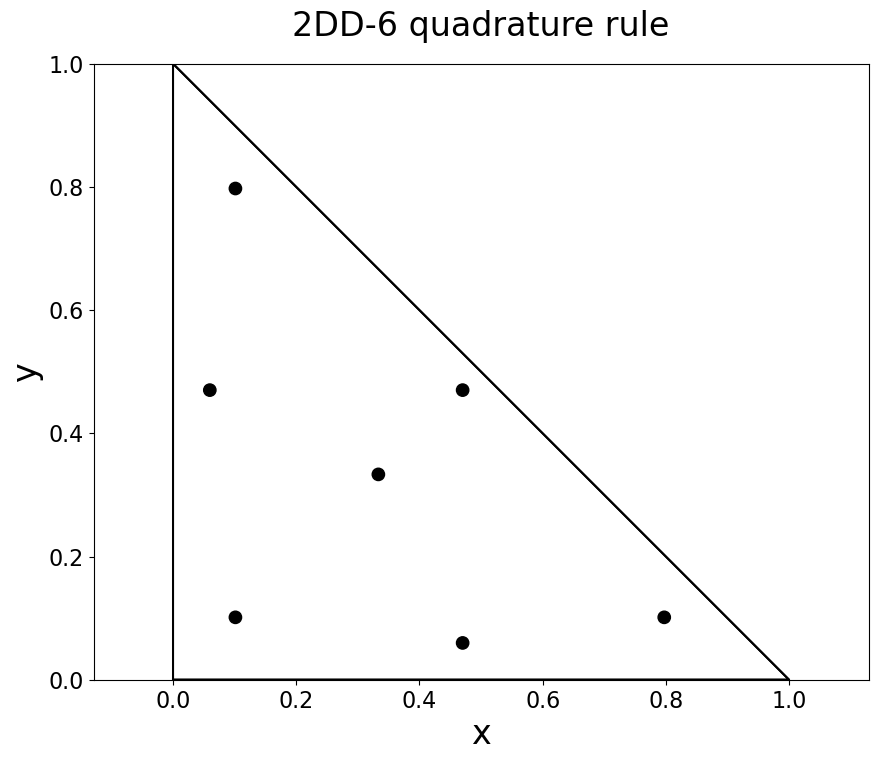

In [3]:
"""
Show the 2D-DG quadrature rule for the 6th order polynomial space on a unit triangle.
Creation of the image: images/8_appendix/quadrature_rule.png.
"""

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='datalim')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

for quad_point in QUAD_POINTS_2DD_6:
    ax.add_patch(patches.Circle(quad_point.point, 0.01, color='black'))

# Plot unit triangle
plt.plot([0, 1, 0], [0, 0, 1], 'black')
plt.plot([0, 1, 0, 0], [0, 0, 1, 0], 'black')
plt.xlabel('x', fontsize=24)
plt.ylabel('y', fontsize=24)
plt.title('2DD-6 quadrature rule', fontsize=24, pad=20)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.show()

In [ ]:
# Create random field for showing the grid perturbation
randomFieldV, jacobianV = calculate_vector_field_eigenpairs(10)
xi = np.random.uniform(-np.sqrt(3), np.sqrt(3), randomFieldV.J)

In [ ]:
"""
Show reference mesh and perturbed mesh in one plot.
Creation of the image: images/4_domain_mapping_method_of_the_poisson_equation/grid_perturbation.png.
"""

mesh = mshr.generate_mesh(DOMAIN, 10)
# perturbed mesh based on the "original" mesh used for the KL-expansion
perturbed_coordinates = mesh.coordinates().copy()
for index, coordinate in enumerate(mesh.coordinates()):
    perturbed_coordinates[index] = randomFieldV(coordinate, xi)
# Create a new mesh with the perturbed coordinates
perturbed_mesh = fe.Mesh(mesh)
perturbed_mesh.coordinates()[:] = perturbed_coordinates

# Plot the original mesh and the perturbed mesh in one figure with different colors
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111)
fe.plot(mesh, color='blue', linewidth=0.5, label='Original Mesh')
fe.plot(perturbed_mesh, color='red', linewidth=0.5, label='Perturbed Mesh')
plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16, markerscale=4)
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.show()

In [ ]:
"""
Show the random field on the reference mesh as a quiver plot.
Creation of the image: images/4_domain_mapping_method_of_the_poisson_equation/randomfield_vectorized.png.
"""

mesh_coordinates = mshr.generate_mesh(DOMAIN, 32).coordinates()
random_field_values = np.array([randomFieldV(coord.copy(), xi) for coord in mesh_coordinates])
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plt.scatter(mesh_coordinates[:, 0], mesh_coordinates[:, 1], color='blue', s=1, label='Mesh Points')
plt.quiver(mesh_coordinates[:, 0], mesh_coordinates[:, 1],
           random_field_values[:, 0] - mesh_coordinates[:, 0],
           random_field_values[:, 1] - mesh_coordinates[:, 1],
           color='red', scale=0.3, scale_units='xy', angles='xy', width=0.002, label='Random Field')
plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)
plt.legend(fontsize=16, markerscale=4)
plt.axis('equal')
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.show()

In [ ]:
"""
Show a solution sample of û on the reference domain.
Creation of the image: images/4_domain_mapping_method_of_the_poisson_equation/poisson_u_hat.png.
"""

u_sol = solve_poisson_for_given_sample(10, jacobianV, xi, RHS_F)

mesh = mshr.generate_mesh(DOMAIN, 10)
x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[-1:1:500j, -1:1:500j]
u_sols = []

for i in range(len(x_coords)):
    u_sols.append(u_sol(x_coords[i], y_coords[i]))

grid_z = griddata((x_coords, y_coords), u_sols, (grid_x, grid_y), method='linear')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
plt.title(r'$\hat{u}(\hat{x}, \omega)$ on $D_{ref}$', fontsize=24, pad=20)
plt.xlabel(r'$\hat{x}_1$', fontsize=24)
plt.ylabel(r'$\hat{x}_2$', fontsize=24)
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
"""
Show a solution sample of u on a sample domain.
Creation of the image: images/4_domain_mapping_method_of_the_poisson_equation/poisson_u.png.
"""

u_sol = solve_poisson_for_given_sample(10, jacobianV, xi, RHS_F)

mesh = mshr.generate_mesh(DOMAIN, 10)
x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[-1.5:1.5:500j, -1.5:1.5:500j]
u_sols = []
x_coords_perturbed = []
y_coords_perturbed = []

for i in range(len(x_coords)):
    P_hat = fe.Point(x_coords[i], y_coords[i])
    x_coords_perturbed.append(randomFieldV(P_hat, xi)[0])
    y_coords_perturbed.append(randomFieldV(P_hat, xi)[1])
    u_sols.append(u_sol(P_hat))


grid_z = griddata((x_coords_perturbed, y_coords_perturbed), u_sols, (grid_x, grid_y), method='linear')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
ax.set_xlim([np.min(x_coords_perturbed) - 0.1, np.max(x_coords_perturbed) + 0.1])
ax.set_ylim([np.min(y_coords_perturbed) - 0.1, np.max(y_coords_perturbed) + 0.1])
plt.title(r'$u(x, \omega)$ on $D(\omega)$', fontsize=24, pad=20)
plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
"""
Calculate KLE for showing eigenvalues and eigenfunctions.
"""

mesh = mshr.generate_mesh(DOMAIN, 8)
V = fe.FunctionSpace(mesh, "DG", 0)
N = V.dim()

basis_functions = []
for i in range(N):
    basis_function = fe.Function(V)
    basis_function.vector()[i] = 1.0
    basis_function.set_allow_extrapolation(True)

    cell_index = V.dofmap().cell_dofs(i)[0]
    cell = fe.Cell(mesh, cell_index)
    vertex_coords = np.array([mesh.coordinates()[vertex] for vertex in cell.entities(0)])

    basis_functions.append(ConstBasisFunction(basis_function, vertex_coords))

C = np.zeros((2 * N, 2 * N))
for i, basis_function_i in enumerate(basis_functions):
    for j, basis_function_j in enumerate(basis_functions):
        if j <= i:
            # Here we use that each block is symmetric because of the symmetry of the covariance functions
            C[i, j] = C[j, i] = get_C_entry(v_cov1_1, basis_function_i, basis_function_j)
            C[i, N + j] = C[j, N + i] = get_C_entry(v_cov1_2, basis_function_i, basis_function_j)
            C[N + i, j] = C[N + j, i] = get_C_entry(v_cov2_1, basis_function_i, basis_function_j)
            C[N + i, N + j] = C[N + j, N + i] = get_C_entry(v_cov2_2, basis_function_i, basis_function_j)

M = np.zeros((2 * N, 2 * N))
for i, basis_function_i in enumerate(basis_functions):
    integrand = basis_function_i.function * basis_function_i.function * fe.dx
    M[i, i] = M[N + i, N + i] = fe.assemble(integrand)

J = 2*N # Number of eigenvectors -> here J = 2*N
eigenvalues, eigenvectors = eig(C, M)
eigenvalues = eigenvalues[:J].real
eigenvectors = eigenvectors[:, :J].real
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Eliminate negative eigenvalues
for index, sorted_eigenvalue in enumerate(sorted_eigenvalues):
    if sorted_eigenvalue < 0:
        sorted_eigenvalues[index] = 0

randomFieldV8 = RandomFieldV(sorted_eigenvalues, sorted_eigenvectors, basis_functions, N, J)
jacobianV8 = JacobianV(sorted_eigenvalues, sorted_eigenvectors, basis_functions, N, J)

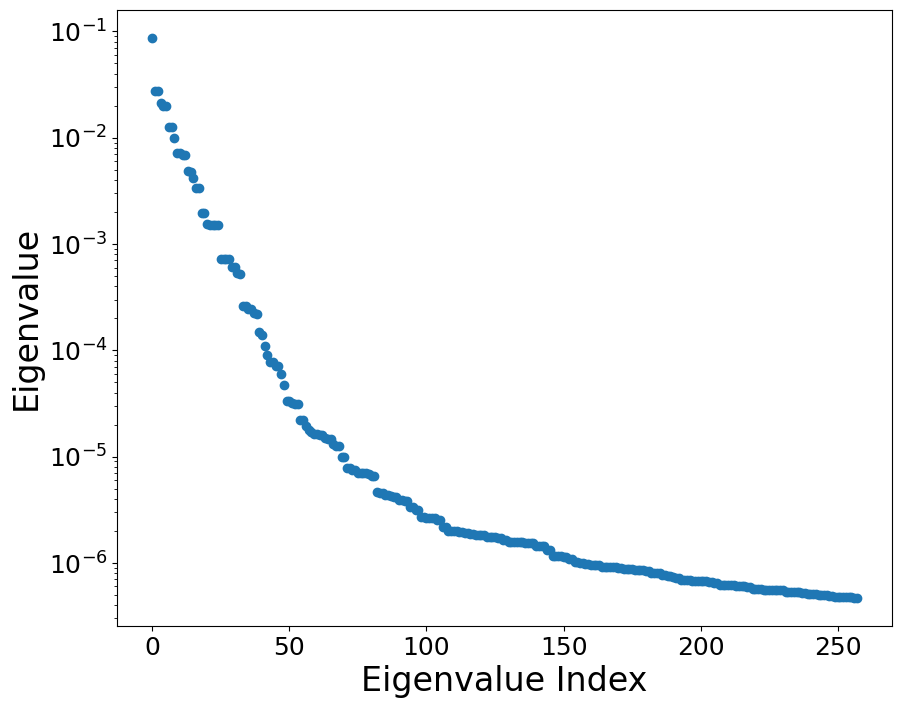

N: 258


In [ ]:
"""
Creation of image: images/4_domain_mapping_method_of_the_poisson_equation/eigenvalues.png.
"""

# Plot the eigenvalues called: eigenvalues
plt.figure(figsize=(10, 8))
plt.plot(randomFieldV8.eigenvalues[:N], 'o')
plt.xlabel('Eigenvalue Index', fontsize=24)
plt.ylabel('Eigenvalue', fontsize=24)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

print(f"N: {N}")

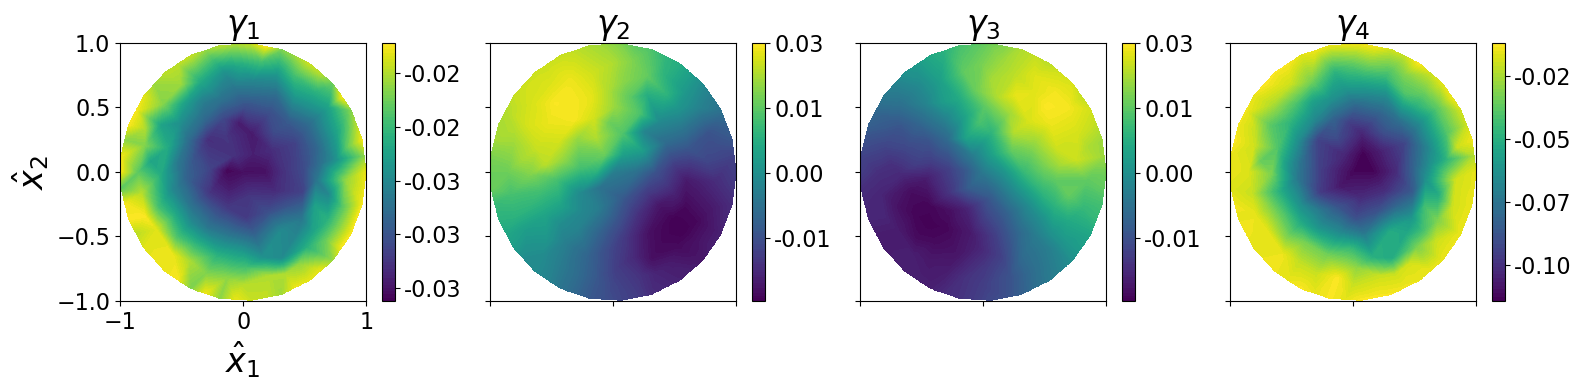

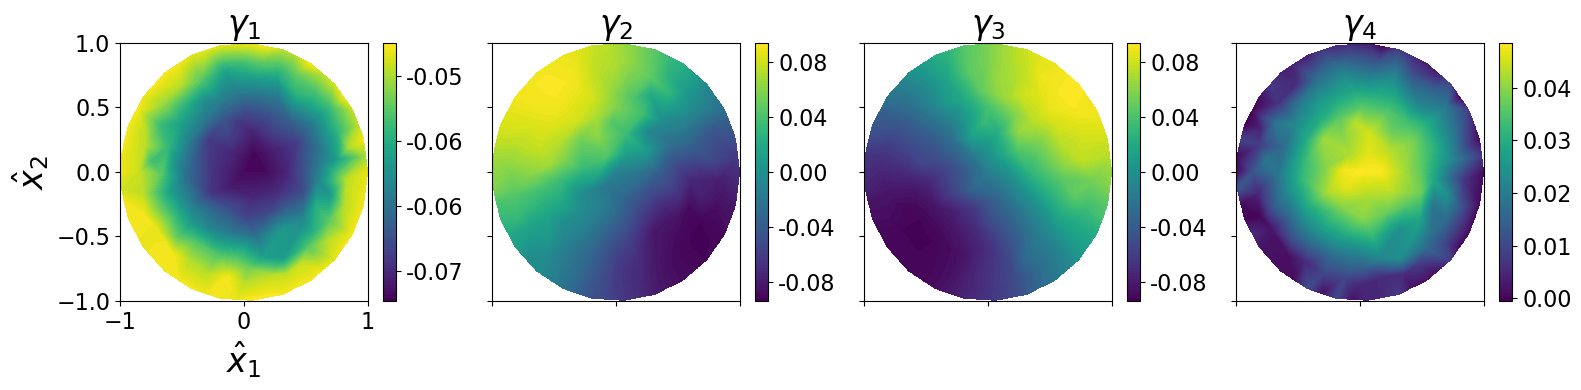

Eigenvalue 1: 0.08723158954479823
Eigenvalue 2: 0.02740798296966315
Eigenvalue 3: 0.027394514134436908
Eigenvalue 4: 0.021332626642784683


In [ ]:
"""
Creation of image: images/4_domain_mapping_method_of_the_poisson_equation/eigenfunction_first_component.png.
Creation of image: images/4_domain_mapping_method_of_the_poisson_equation/eigenfunction_second_component.png.
"""

eval_eigenfunc_k = lambda x, k: np.array([sum([randomFieldV8.basis_functions[j].function(x) * randomFieldV8.eigenvectors[j, k] for j in range(randomFieldV8.N)]), 
                                          sum([randomFieldV8.basis_functions[j].function(x) * randomFieldV8.eigenvectors[j + randomFieldV8.N, k] for j in range(randomFieldV8.N)])])

x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[-1:1:500j, -1:1:500j]

columns = 4
# First component
fig, axs = plt.subplots(1, columns, figsize=(16, 4))

for k in range(columns):
    ax = axs[k]
    z_values = []
    for i in range(len(x_coords)):
        z_values.append(eval_eigenfunc_k([x_coords[i], y_coords[i]], k)[0])
    
    grid_z = griddata((x_coords, y_coords), z_values, (grid_x, grid_y), method='linear')
    cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
    cbar = plt.colorbar(cp)
    cbar.ax.tick_params(labelsize=16)
    cbar.locator = MaxNLocator(nbins=5)
    cbar.update_ticks()
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # Round to 2 decimal places
    ax.set_title(rf'$\gamma_{k+1}$', fontsize=24)
    if k == 0:
        ax.set_xlabel(r'$\hat{x}_1$', fontsize=24)
        ax.set_ylabel(r'$\hat{x}_2$', fontsize=24)
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()


# Second component
fig, axs = plt.subplots(1, columns, figsize=(16, 4))
for k in range(columns):
    ax = axs[k]
    z_values = []
    for i in range(len(x_coords)):
        z_values.append(eval_eigenfunc_k([x_coords[i], y_coords[i]], k)[1])
    
    grid_z = griddata((x_coords, y_coords), z_values, (grid_x, grid_y), method='linear')
    cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
    cbar = plt.colorbar(cp)
    cbar.ax.tick_params(labelsize=16)
    cbar.locator = MaxNLocator(nbins=5)
    cbar.update_ticks()
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # Round to 2 decimal places
    ax.set_title(rf'$\gamma_{k+1}$', fontsize=24)
    if k == 0:
        ax.set_xlabel(r'$\hat{x}_1$', fontsize=24)
        ax.set_ylabel(r'$\hat{x}_2$', fontsize=24)
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=16)
    

plt.tight_layout()
plt.show()

# Print first 4 eigenvalues
print(f"Eigenvalue 1: {randomFieldV8.eigenvalues[0]}")
print(f"Eigenvalue 2: {randomFieldV8.eigenvalues[1]}")
print(f"Eigenvalue 3: {randomFieldV8.eigenvalues[2]}")
print(f"Eigenvalue 4: {randomFieldV8.eigenvalues[3]}")

Data dimensions: sparse:  (22600, 225) fine:  (8800, 225)
MC Sample sizes sparse:  [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
MC Sample size fine:  8800
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of

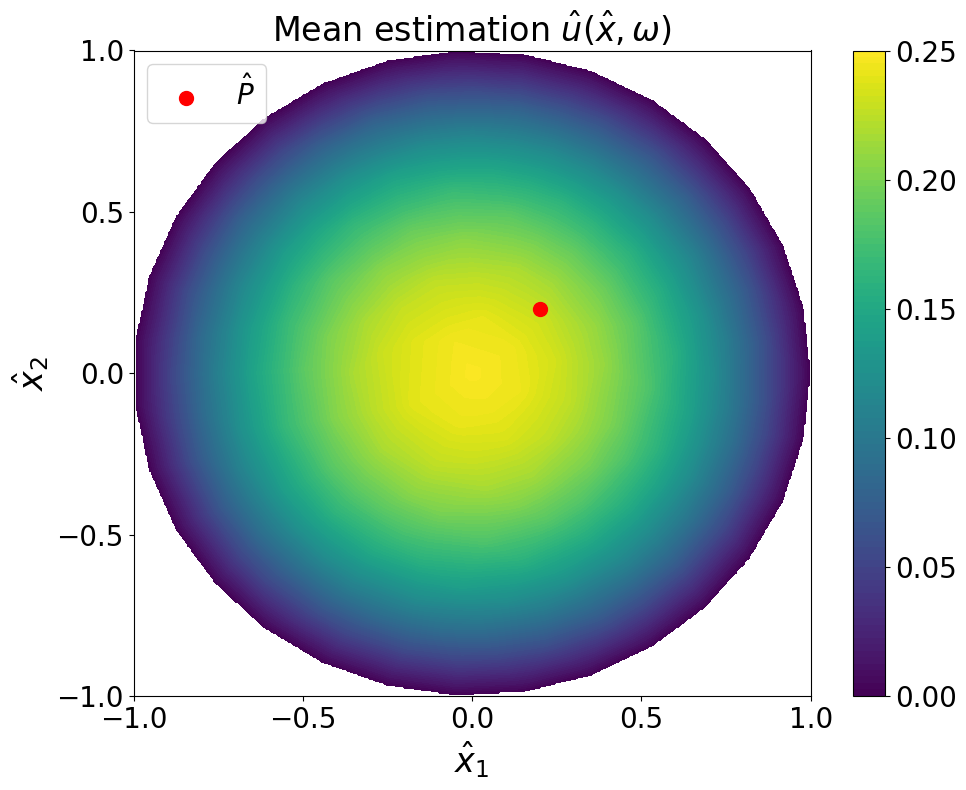

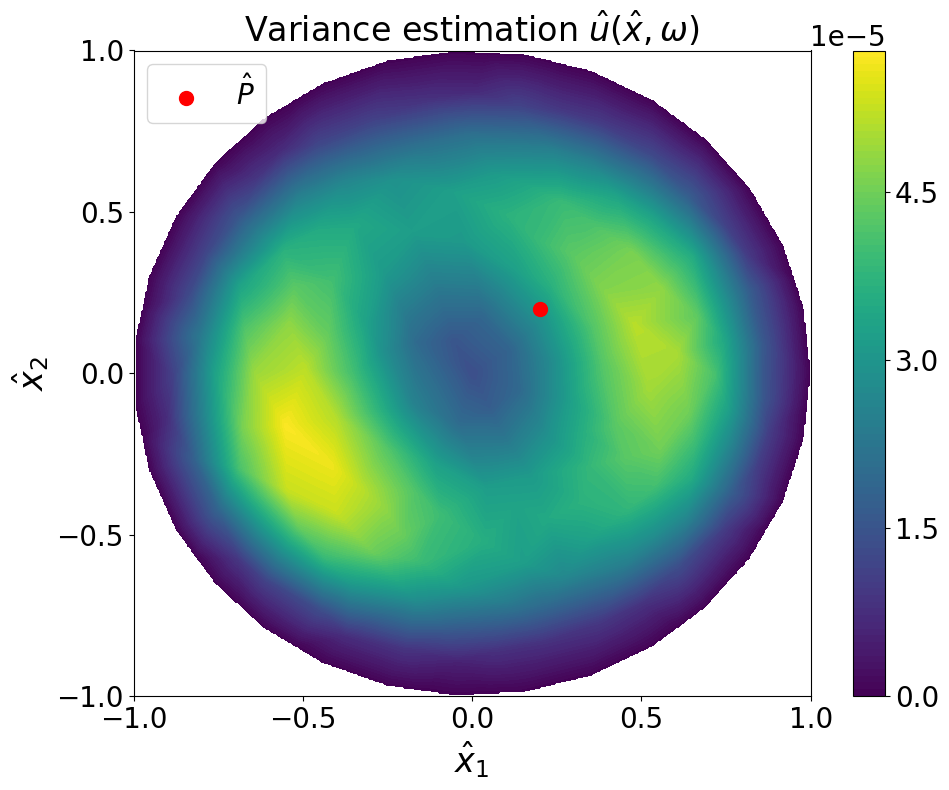

/Users/elias/git/Masterthesis/poisson/helpers.py:507: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



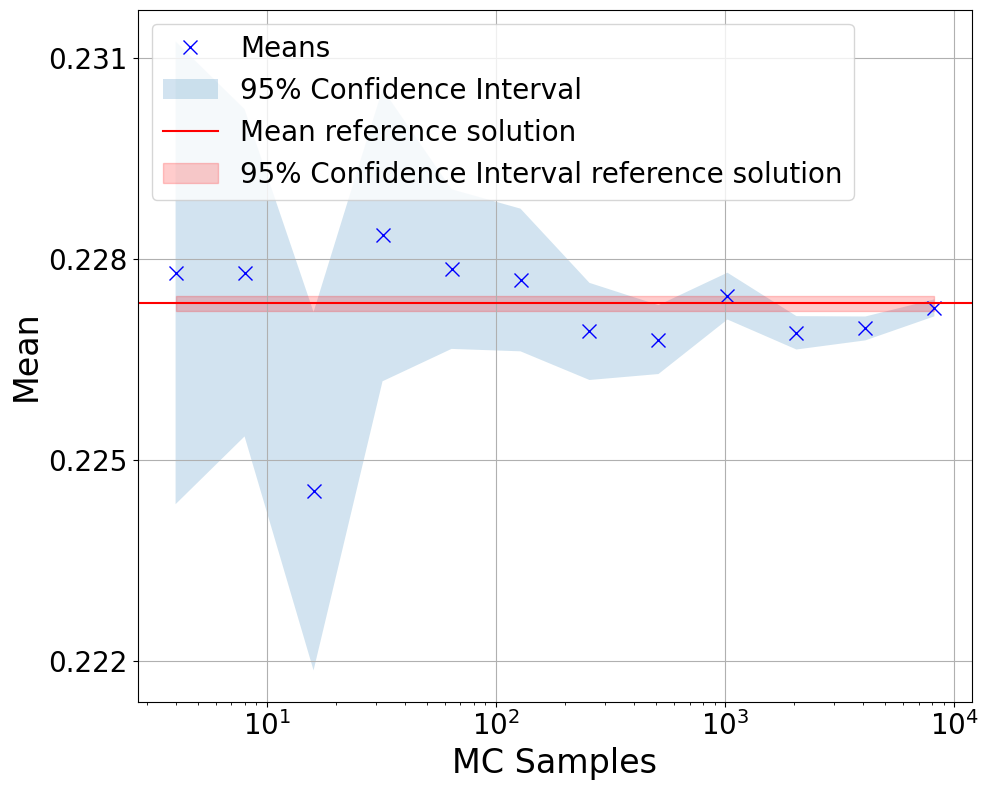

/Users/elias/git/Masterthesis/poisson/helpers.py:523: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "go" (-> marker='o'). The keyword argument will take precedence.



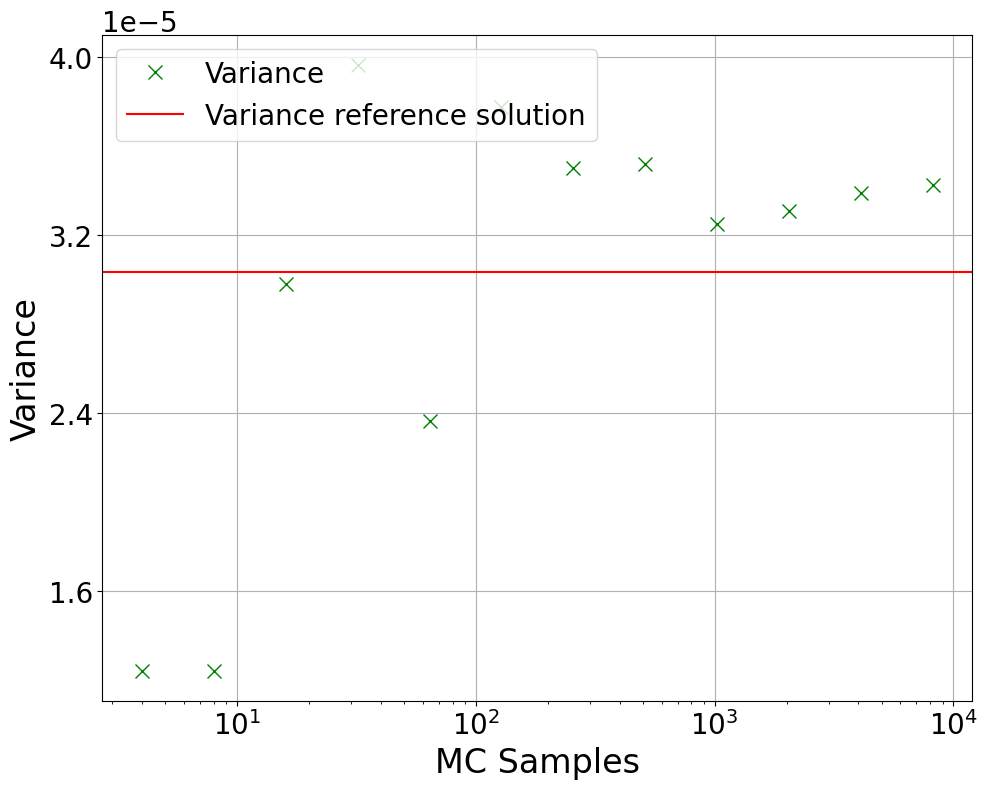

/Users/elias/git/Masterthesis/poisson/helpers.py:542: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



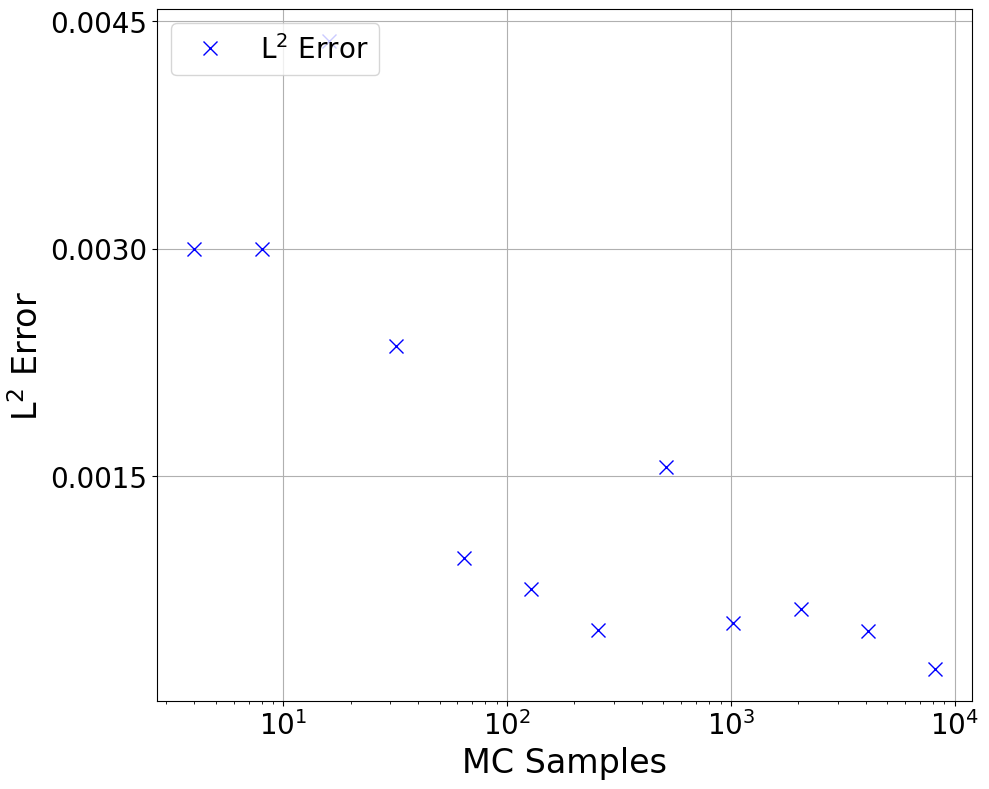

/Users/elias/git/Masterthesis/poisson/helpers.py:555: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



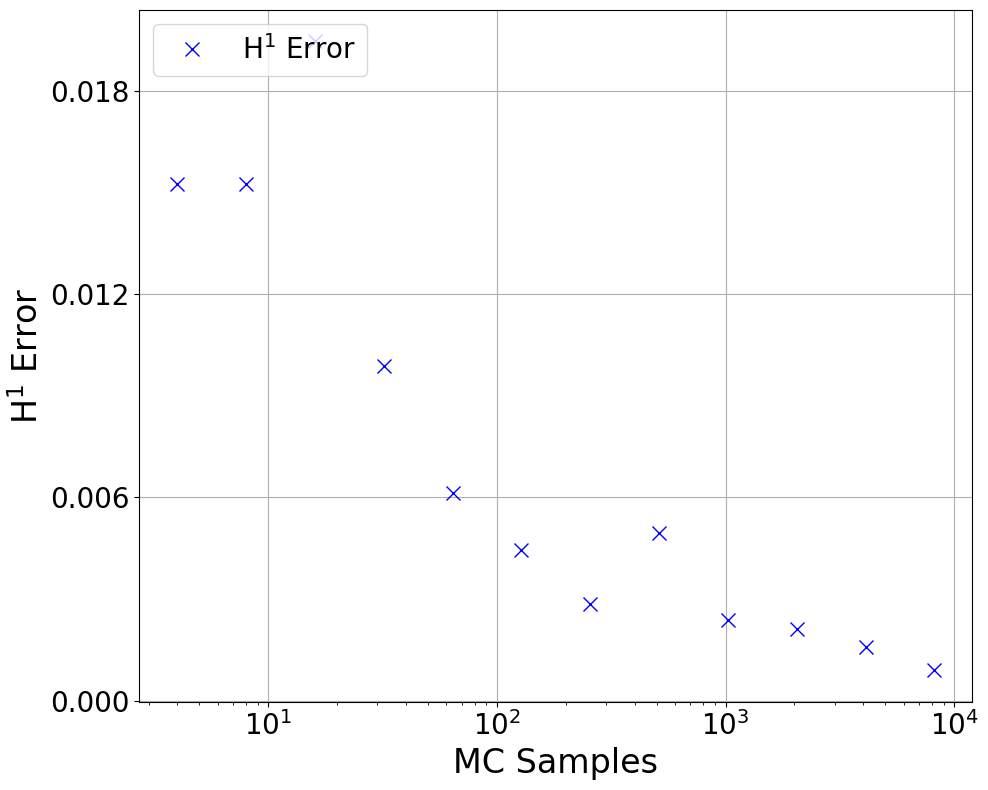

In [ ]:
"""
Creation of image: images/4_domain_mapping_method_of_the_poisson_equation/poisson_mean.png.
Creation of image: images/4_domain_mapping_method_of_the_poisson_equation/poisson_mean_convergence.png.
Creation of image: images/4_domain_mapping_method_of_the_poisson_equation/poisson_variance.png.
Creation of image: images/4_domain_mapping_method_of_the_poisson_equation/poisson_variance_convergence.png.
Creation of image: images/4_domain_mapping_method_of_the_poisson_equation/poisson_L2_error.png.
Creation of image: images/4_domain_mapping_method_of_the_poisson_equation/poisson_H1_error.png.
"""

analyse_two_resolutions_from_data_u_hat(resolution_sparse = 10,
                                  resolution_fine = 14,
                                  P_hat = fe.Point(0.2, 0.2))

In [ ]:
# Calculate the necessary random field V for the sobol plotting

mesh_res = 8
size_of_xi = 8
randomFieldV, jacobianV = calculate_vector_field_eigenpairs(mesh_res)

KeyboardInterrupt: 

/Users/elias/git/Masterthesis/poisson/helpers.py:829: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



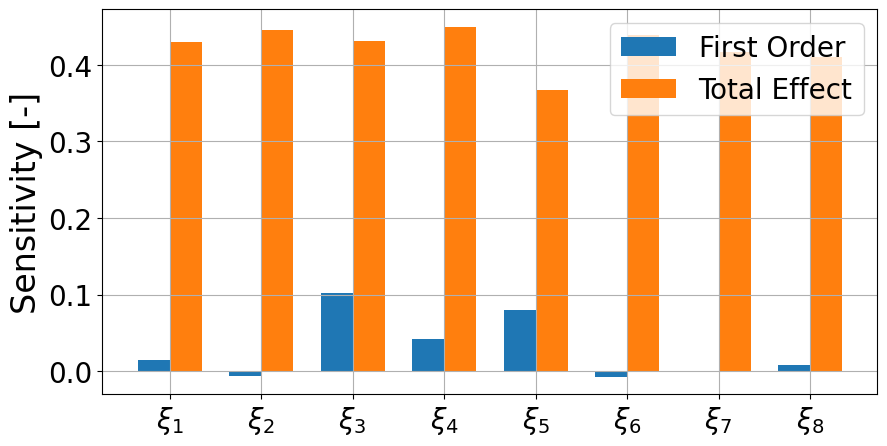

Sample size: 12000


In [ ]:
"""
Creation of image: images/4_domain_mapping_method_of_the_poisson_equation/poisson_sobols.png.
"""

S_single, S_total, mc_sample_size = poisson_sobol_calc_indices_from_data(fem_res=mesh_res, kl_res=mesh_res,
                                                                         size_of_xi=size_of_xi,
                                                                         randomFieldV=randomFieldV, jacobianV=jacobianV)
poisson_plot_sobols(S_single, S_total, mc_sample_size, title=f"Sobol Indices for Poisson Problem Mesh resolution {mesh_res}")

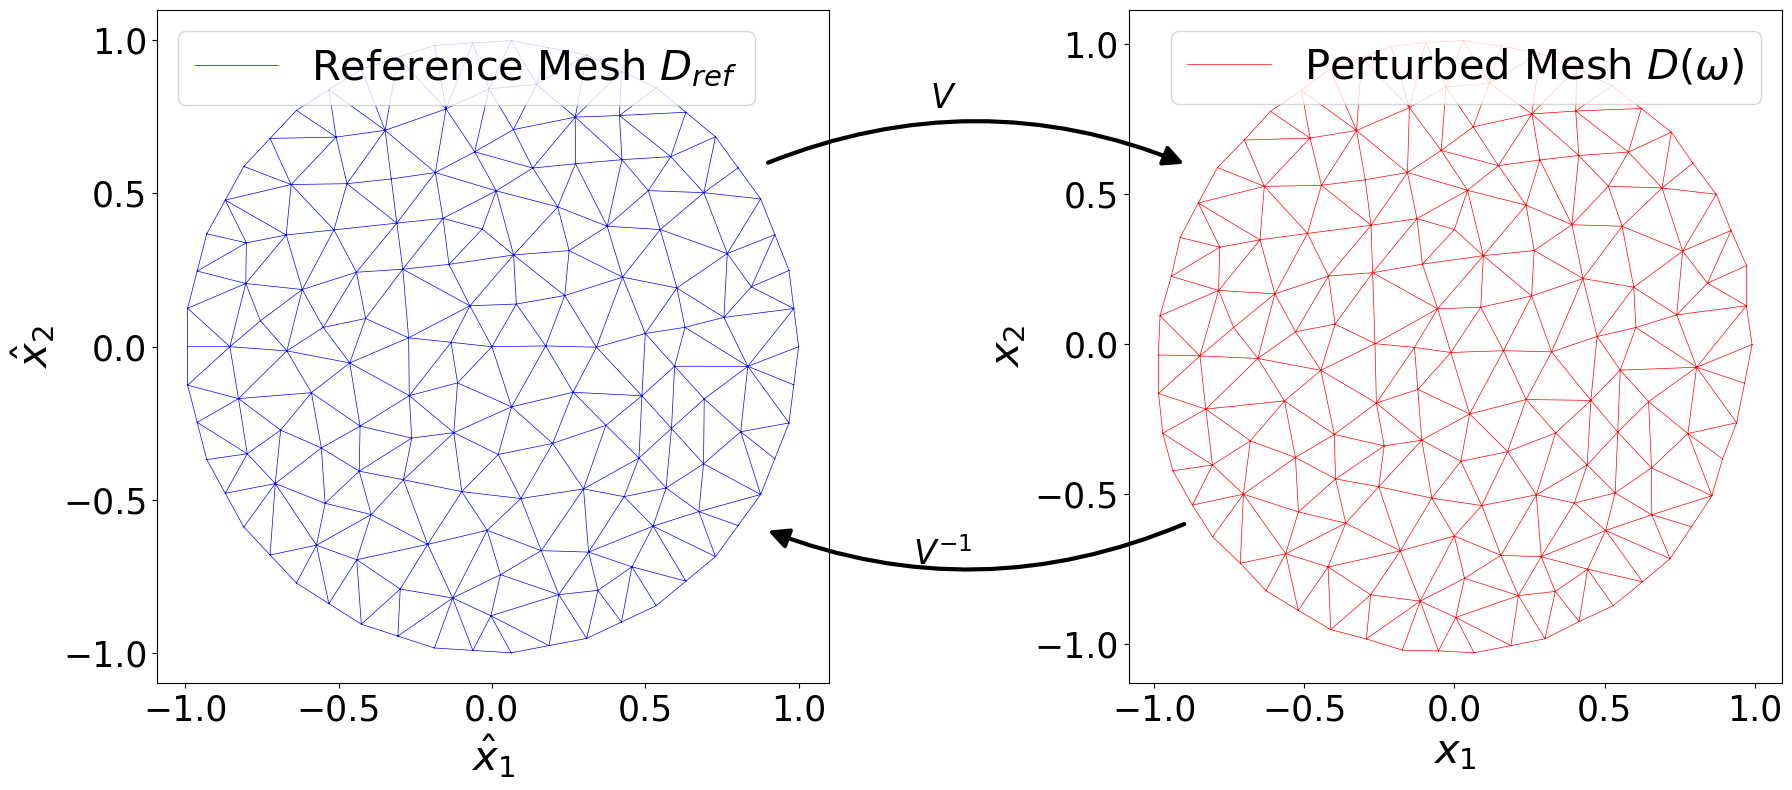

In [ ]:
"""
Show the mesh perturbation in two connected plots.
Creation of the image: images/1_introduction/grid_perturbation.png
"""

mesh_resolution = 8
randomFieldV, jacobianV = calculate_vector_field_eigenpairs(mesh_resolution)
xi = np.random.uniform(-np.sqrt(3), np.sqrt(3), randomFieldV.J)
mesh = mshr.generate_mesh(DOMAIN, mesh_resolution)
perturbed_coordinates = mesh.coordinates().copy()
for index, coordinate in enumerate(mesh.coordinates()):
    perturbed_coordinates[index] = randomFieldV(coordinate, xi)
# Create a new mesh with the perturbed coordinates
perturbed_mesh = fe.Mesh(mesh)
perturbed_mesh.coordinates()[:] = perturbed_coordinates

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plotting (Corrected - Using fe.plot correctly)
ax1 = axs[0]
plt.subplot(1, 2, 1)
fe.plot(mesh, color='blue', linewidth=0.5, label=r'Reference Mesh $D_{ref}$')
ax1.set_xlabel(r'$\hat{x}_1$', fontsize=30)
ax1.set_ylabel(r'$\hat{x}_2$', fontsize=30)
ax1.legend(fontsize=30, markerscale=4, loc='upper left')
ax1.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax1.tick_params(axis='both', which='major', labelsize=25)

ax2 = axs[1]
plt.subplot(1, 2, 2)
fe.plot(perturbed_mesh, color='red', linewidth=0.5, label=r'Perturbed Mesh $D(\omega)$')
ax2.set_xlabel(r'$x_1$', fontsize=30)
ax2.set_ylabel(r'$x_2$', fontsize=30)
ax2.legend(fontsize=30, loc='upper right')
ax2.tick_params(axis='both', which='major', labelsize=25)
ax2.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax2.xaxis.set_major_locator(MaxNLocator(nbins=5))


# Add first arrow
xyA = [0.9, 0.6]
xyB = [-0.9, 0.6]

arrow = patches.ConnectionPatch(
    xyA,
    xyB,
    coordsA=ax1.transData,
    coordsB=ax2.transData,
    color="black",
    arrowstyle="-|>",
    mutation_scale=30,
    linewidth=3,
    connectionstyle="arc3,rad=-0.2"
)
fig.patches.append(arrow)

# Label first arrow
fig.text(0.51, 0.87, r'$V$', ha='center', va='center', fontsize=24)

# Add second arrow
xyA = [0.9, -0.6]
xyB = [-0.9, -0.6]

arrow = patches.ConnectionPatch(
    xyB,
    xyA,
    coordsA=ax2.transData,
    coordsB=ax1.transData,
    color="black",
    arrowstyle="-|>",
    mutation_scale=30,
    linewidth=3,
    connectionstyle="arc3,rad=-0.2"
)
fig.patches.append(arrow)

# Label second arrow
fig.text(0.51, 0.3, r'$V^{-1}$', ha='center', va='center', fontsize=24)

plt.tight_layout()
plt.show()
